# Welcome to Weeks 2: Machine Learning of CTD Python 200

# Hands-on activity: Train a Regression Model to Predict House Prices

- In this activity, we will use real housing data to build a Linear Regression model that can predict the price of a house based on its features (like size, bedrooms, etc.).

- We will train the model, test how well it performs, and visualize the results to understand how accurate our predictions are.


# Steps We Will Follow
    1. Load, explore and fix the issues the dataset
    2. Select features (X) and target (y)
    3. Split the data into training and test sets
    4. Train a Linear Regression model using scikit-learn
    5. Make predictions on the test data
    6. Evaluate and visualize predictions
    7. Compare training vs testing performance
    8. Discuss what we learned

# Let's begin 

# Import the Required Libraries

In [36]:
import numpy as np 
import pandas as pd #


# Data handling, data processing and CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# linear algebra
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Machine Learning (Linear Regression + train/test split + metrics)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load and explore the dataset

In [27]:
# read dataset

housing_df = pd.read_csv("resources/Week2_Housing_Data.csv")

In [51]:
# column names in the dataset

housing_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [29]:
# see top 5 rows

housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [31]:
# see column data type and some info

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [47]:
# see dimensions

housing_df.shape

(545, 13)

In [55]:
# check for duplicate values

housing_df.duplicated().sum()

0

In [59]:
# see precentege of missing value in each column

housing_df.isna().sum() / housing_df.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [63]:
# see quick info of numeric values

housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [65]:
# see quick info of category values 

housing_df.describe(include = object)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


# Observations So Far
- The dataset has 545 rows and 13 columns.
- There are no missing values and no duplicate rows, so the data is already fairly clean.
- Some columns are numeric (e.g., area, bedrooms, bathrooms, stories, parking, and price).
- Many columns are categorical (e.g., mainroad, guestroom, basement, airconditioning, etc.).
  - For example: These columns have values like "yes", "no", "furnished", "semi-furnished" — which are text. 
- Machine learning models (like Linear Regression) require numeric input, so we will need to convert the categorical columns into numeric form.

# Converting Categorical Data to Numbers 


# What This Means for Our Dataset

     - For columns like: mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea: we will use 1/0 simple mapping
         - These are yes/no, so we will convert: yes → 1  and no → 0
    
     - For furnishingstatus, which has 3 categories(furnished, semi-furnished, unfurnished): 
         We will use one-hot encoding: turns categories into separate binary columns.
            1. furnished → [1,0,0]
            2. semi-furnished → [0,1,0]
            3. unfurnished → [0,0,1]

In [88]:
# Convert yes/no to 1/0
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing_df[yes_no_cols] = housing_df[yes_no_cols].replace({'yes': 1, 'no': 0})

/var/folders/k7/74j1vnvn1_l9qvqn1l1rcbfw0000gn/T/ipykernel_92158/3415398964.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housing_df[yes_no_cols] = housing_df[yes_no_cols].replace({'yes': 1, 'no': 0})


In [94]:
# One-hot encode furnishingstatus
housing_df = pd.get_dummies(housing_df, columns=['furnishingstatus'], drop_first=True)

In [96]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


# Step 2: Select Features (X) and Target (y)

What are we doing here?

    - y (Target) is the value we want to predict
        - In our case: price

    - X (Features) are the columns we use to make the prediction
        - Things like area, bedrooms, bathrooms, etc.
    
    - We do NOT include price in X, because that's what we are trying to predict.

# For now, we’ll keep the model simple and focused and use just a few strong predictors:
    - Feature Selection (X)
    1. area:	House size(numeric)
    2. bedrooms:	Number of bedrooms(numeric)
    3. bathrooms:	Number of bathrooms(numeric)
    4. parking:	Parking spaces(numeric)
    5. basement:	Has basement?(1/0)
    6. hotwaterheating:	Has hot water heating?(1/0)
    7. airconditioning:	Has AC?(1/0)

    - And Target y = price

# Target variable (what we want to predict)
y = housing_df['price']

# Features we will use to predict the price
feature_cols = ['area', 'bedrooms', 'bathrooms', 'parking', 
                'basement', 'hotwaterheating', 'airconditioning']

X = housing_df[feature_cols]

# Preview features and target
X.head(), y.head()

# Quick Explanation: 
- We are choosing features that are likely to influence house price.
- Features like size, number of rooms, and home amenities often affect how much a house costs.
- By adding these as inputs to our model, we help the model learn better patterns.

# Step 3: Split the Data into Training and Test Sets

### Why Do We Split the Data?

We want to check **how well the model performs on new, unseen data**  not just the data it learned from.

So we split the dataset into two parts:

- **Training Set:** used to **teach** the model  
  → `X_train`, `y_train`

- **Test Set:** used to **evaluate** how well the model performs on data it has **never seen before**  
  → `X_test`, `y_test`

This helps us understand whether the model can **generalize** (learn real patterns) rather than just **memorize** the training data.

**Think of it this way:**  a student preparing for an exam, they learn from study material (training set) and then take a test they’ve never seen before (test set).


In [200]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shapes to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((436, 7), (109, 7), (436,), (109,))

### Why Do We Need X and y for Both Training and Testing?

- **X** contains the **features** (house details like area, bedrooms, parking, etc.).  
  These are the **inputs** the model uses to make predictions.

- **y** contains the **target** (the **actual house price**).  
  This is the **correct answer** we want the model to learn to predict.

---

### Why we use X and y during training:
The model learns patterns by comparing:
- its predictions (from X_train)
- with the real prices that we already know (y_train)

This helps the model learn relationships such as:
"bigger house + more useful features usually means a higher price."

---

### Why we also use X and y during testing:
The test data is **new to the model**, but **we already know** the real prices (y_test).  
We do **not** show y_test to the model during prediction, we only use it to check accuracy afterward.

This is like giving a student a test:
- The **student** hasn’t seen the test before (X_test)
- But the **teacher** already knows the correct answers (y_test)
- We compare to see how well the student learned.

---

| Set | X (Features) | y (Target) | Purpose |
|---|---|---|---|
| **Training Set** | X_train | y_train | Model **learns** patterns |
| **Test Set** | X_test | y_test | We **evaluate** how well it learned |

---

This helps us check whether the model can **generalize** to new, unseen houses.


# Step 4: Train a Linear Regression Model

### Train a Linear Regression Model

Now that we have:
- Selected our features (X)
- Selected our target (y)
- Split the data into **training** and **test** sets

We are ready to **train the model**.

We will use **Linear Regression**, which tries to learn the relationship between the house features and the price.

In simple terms:
> The model will learn how each feature affects the price of a house.


In [208]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train (fit) the model on the training data
model.fit(X_train, y_train)


LinearRegression()

- `LinearRegression()` creates an empty model.
- `model.fit(X_train, y_train)` teaches the model the relationship between features and price by learning patterns in the data.

After training, the model has **learned**:
- Which features increase price
- Which features don’t matter much
- How strongly each feature affects price


# Step 5: Make predictions on the test data

Now that the model has learned from the **training data**, we want to see how well it performs on **new (unseen) houses**, the test data.

We only give the model **X_test** (house features).  
The model will try to **predict the price** for each house.

---


Before predicting, let's take a quick look at the **test features (X_test)**.  
These are houses the model has **never seen during training**.

In [234]:
# Show the first few rows of the test features
X_test.head()

,area,bedrooms,bathrooms,parking,basement,hotwaterheating,airconditioning
316,5900,4,2,1,1,0,0
77,6500,3,2,0,0,0,1
360,4040,2,1,0,0,0,0
90,5000,3,1,0,0,0,1
493,3960,3,1,0,0,0,0


- These are the house details the model will use to **guess** the prices.
- We still **do not** show the model the real prices (`y_test`) yet.

In [250]:
# Predict house prices for the test data
y_pred = model.predict(X_test)

# Show first few predicted prices
y_pred[:5].round(2)

array([6042852.87, 6351696.23, 3153132.01, 4736850.  , 3371132.04])

### What Did We Just Do?

- The model looked at **X_test** (only house features)
- And returned **predicted prices** → `y_pred`
- We will soon compare these predictions with the **real** prices (`y_test`)
  to evaluate how well the model learned.

# Create a comparison table of actual vs predicted prices

In [265]:
# Compare Predicted vs Actual Prices
comparison = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

# Show first few rows
comparison.head().round(2)

,Actual Price,Predicted Price
0,4060000,6042852.87
1,6650000,6351696.23
2,3710000,3153132.01
3,6440000,4736850.00
4,2800000,3371132.04


### Understanding the Comparison

- **Actual Price** → The real selling price from the dataset.
- **Predicted Price** → The price our model guessed based on the features.

If the numbers are **close**, the model is doing well.  
If they are **far apart**, the model needs improvement (we’ll evaluate this next).

### ❗ Why Do the Predictions Look Off?

Right now, our model is not very accurate.  
This is because we only used **a few features** (area, bedrooms, bathrooms, etc.).

But house prices depend on **many more factors**, such as:
- Location / neighborhood  
- Whether it has a guest room or preferred area  
- Furnishing status  
- Number of stories, etc.

Since the model doesn't have all the important information yet,  
it **cannot learn the full pattern** — so the predictions are not very close.

**Key idea:**  
A model is only as good as the **data and features** we give it.


## Step 6: Evaluate the Model

Now we compare the **predicted prices** (`y_pred`) with the **actual prices** (`y_test`) to see how well our model performed.

We will use:
- **Predicted vs Actual Plot** → shows how close predictions are
- **Residuals (Errors)** → difference between predicted and real values
- **Evaluation Metrics:**
  - **MSE (Mean Squared Error)** → lower is better
  - **R² Score** → closer to 1 means better performance


# 1. Plot Predicted vs Actual Prices

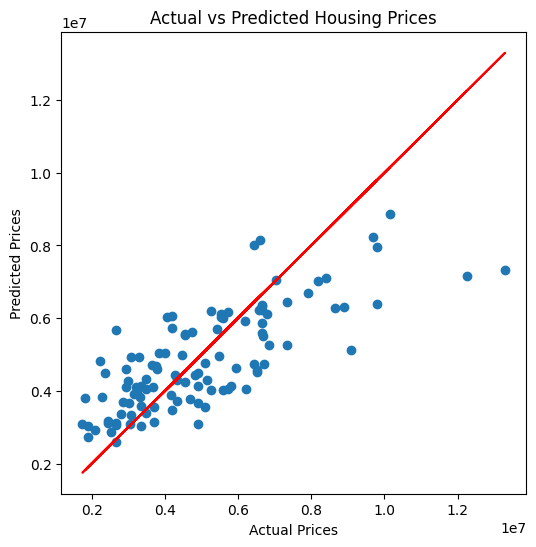

In [272]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')  # perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()


If the model were perfect, all points would lie on the **red line**.
The more they spread away, the less accurate the model is.

# 2. Look at Residuals (Errors)

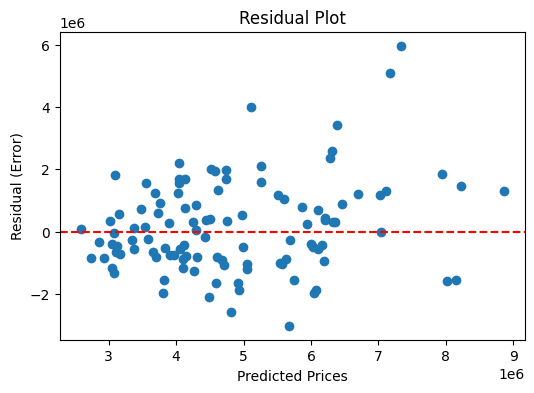

In [277]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot")
plt.show()


Residuals show how far off each prediction is.
A good model has residuals **scattered randomly** around zero.

# 3. Compute Evaluation Metrics (MSE & R²)

In [281]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 2218406272521.1567
R² Score: 0.5611088254003715


### How to Interpret the Metrics

- **MSE (Mean Squared Error)**  
  Measures how far predictions are from actual prices.  
  **Lower = better**

- **R² Score**  
  Tells how well the model explains the data (fits the trend).  
  **1.0 = perfect fit**,  
  **0.0 = model didn’t learn anything useful**

Since we used only a few features, our model may not perform very well — and that's okay.  
The goal here is to *understand* how to train, predict, and evaluate.


## Step 7: Compare Training vs Testing Performance

To understand how well our model generalizes, we compare:
- **Training performance** → how well the model fits the data it learned from
- **Testing performance** → how well the model performs on new, unseen data

This helps us detect:
- **Overfitting** → Model performs well on training but poorly on testing
- **Underfitting** → Model performs poorly on both training and testing


# Compute R² Score for Training and Testing Data
###  Interpreting the Results

- If **Training R² is much higher than Testing R²** → The model is **overfitting**  
  (It memorized the training data but cannot generalize)

- If **Both Training and Testing R² are low** → The model is **underfitting**  
  (It did not learn enough patterns)

- If **Both scores are similar and reasonably high** → The model is **performing well**


In [287]:
# Predictions on training data
y_train_pred = model.predict(X_train)

# Evaluate R² score for both
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_pred)

print("Training R² Score:", train_r2)
print("Testing R² Score:", test_r2)


Training R² Score: 0.6070551190691234
Testing R² Score: 0.5611088254003715


## Let's visualise R² Score for Training and Testing Data

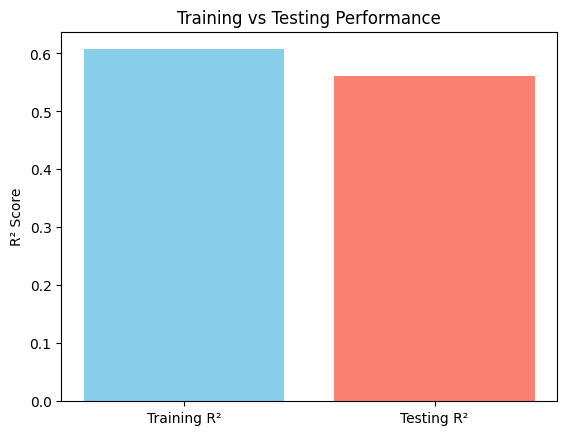

In [298]:
# Visualization: Bar Chart
plt.bar(['Training R²', 'Testing R²'], [train_r2, test_r2], color=['skyblue', 'salmon'])
plt.ylabel('R² Score')
plt.title('Training vs Testing Performance')
plt.show()


###  Understanding the Result

- **Training R² Score:** 0.61  
- **Testing R² Score:** 0.56  

Both scores are **moderately similar**, which means:

- The model is **not overfitting**, it did not simply memorize the training data.
- The model is also **not underfitting**, it has learned some useful patterns.
- However, the scores are not very high, so the model is **not very accurate yet**.

### Key Learning

The model has learned the general relationship between house features and price,  
but it is **missing important information** (like location, furnishing status, etc.).  
To improve performance, we need to:
- Add more features
- Try more flexible models (like Polynomial Regression)

This should be your ideal next step.


##  Step 9: What Did We Learn?

In this activity, we:

1. **Explored a housing dataset**
2. **Selected useful features** and identified which were categorical
3. **Encoded** categorical features into numbers (One-Hot Encoding)
4. **Split the data** into training and testing sets
5. **Trained a Linear Regression model** using scikit-learn
6. **Made predictions** on unseen test data
7. **Evaluated the model** using:
   - Actual vs Predicted comparison
   - Residual plot
   - MSE and R² Score
8. **Compared training vs testing performance** to check for overfitting/underfitting

---

###  Key Takeaways

- A **regression model** predicts **continuous values** like house prices.
- The model learns by finding patterns between **features (X)** and the **target (y)**.
- Splitting data into **training** and **testing** helps us check if the model can handle **new data**.
- Our **R² scores** (~0.60) show the model learned *some* patterns, but **not enough** to be highly accurate.
- The model performed **similarly** on training and testing data →  
  meaning **no overfitting**, but also **room for improvement**.

---

###  Real World Understanding

Just like a real estate agent gets better at estimating prices **after seeing many houses**,  
our model improves when we:
- Give it **more useful features**
- Allow it to learn more complex patterns

---

###  Where Do We Go Next?

To improve this model, we will:
- Add more features (like furnishing status, preferred area, etc.)
- Try **Polynomial Regression** to capture curved relationships
- Compare results to see which approach performs better

---

Great job completing the Linear Regression workflow!


# Thank you